# Install dependencies

In [1]:
%pip install --quiet --upgrade git+https://github.com/mozilla-ai/osm-ai-helper.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00


In [2]:
%pip install --quiet sam2 ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.6 MB/s eta 0:00:00


# Setup Secrets

You need to set the following secrets in the notebook.



In [6]:
import os

from google.colab import userdata

os.environ["MAPBOX_TOKEN"] = userdata.get("MAPBOX_TOKEN")
os.environ["OSM_CLIENT_ID"] = userdata.get("OSM_CLIENT_ID")
os.environ["OSM_CLIENT_SECRET"] = userdata.get("OSM_CLIENT_SECRET")

# Download Trained Model

You can check the [Create Dataset](https://colab.research.google.com/github/mozilla-ai//osm-ai-helper/blob/main/demo/create_dataset.ipyn) and [Finetune Model](https://colab.research.google.com/github/mozilla-ai//osm-ai-helper/blob/main/demo/finetune_model.ipynb) notebooks to learn how to train your own model.

In [7]:
from huggingface_hub import hf_hub_download

In [8]:
hf_hub_download(
    "daavoo/yolo-osm-pool-detector",
    filename="model.pt",
    repo_type="model",
    local_dir="models",
)

'models/model.pt'

# Run Inference

In [9]:
# @title Click on the map and copy-paste the latitude and longitude

import folium
from branca.element import MacroElement
from jinja2 import Template
from IPython.display import display


class LatLngPopup(MacroElement):
    _template = Template(
        """
            {% macro script(this, kwargs) %}
                var {{this.get_name()}} = L.popup();
                function latLngPop(e) {
                    {{this.get_name()}}
                        .setLatLng(e.latlng)
                        .setContent(e.latlng.lat.toFixed(4) + ", " + e.latlng.lng.toFixed(4))
                        .openOn({{this._parent.get_name()}});
                    }
                {{this._parent.get_name()}}.on('click', latLngPop);
            {% endmacro %}
            """
    )

    def __init__(self):
        super().__init__()
        self._name = "LatLngPopup"


m = folium.Map(location=[42.2489, -8.5117], zoom_start=11, tiles="OpenStreetMap")

m.add_child(LatLngPopup())

# 3. Display the map in Colab
display(m)

In [10]:
# Paste the copied values here
LAT, LON = 42.2052, -8.5078

# Run Inference

In [11]:
from osm_ai_helper.run_inference import run_inference

existing, new, missing = run_inference(
    "models/model.pt",
    output_dir="results",
    lat_lon=(LAT, LON),
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


sam2_hiera_small.pt:   0%|          | 0.00/184M [00:00<?, ?B/s]

2025-02-17 09:53:49.269 | INFO     | osm_ai_helper.run_inference:run_inference:50 - Downloading elements for leisure=swimming_pool in (42.200038266046754, -8.515777587890625, 42.21122801157103, -8.50067138671875)
2025-02-17 09:53:49.921 | INFO     | osm_ai_helper.run_inference:run_inference:53 - Found 0 elements
2025-02-17 09:53:49.923 | INFO     | osm_ai_helper.run_inference:run_inference:55 - Downloading stacked image and mask for (42.200038266046754, -8.515777587890625, 42.21122801157103, -8.50067138671875)
2025-02-17 09:55:16.994 | INFO     | osm_ai_helper.run_inference:run_inference:62 - Predicting on stacked image
2025-02-17 09:55:47.765 | INFO     | osm_ai_helper.run_inference:run_inference:68 - Finding existing, new and missed polygons
2025-02-17 09:55:48.991 | INFO     | osm_ai_helper.run_inference:run_inference:71 - Painting evaluation
2025-02-17 09:56:05.803 | INFO     | osm_ai_helper.run_inference:run_inference:81 - Saving new polygons


# Manually Filter results

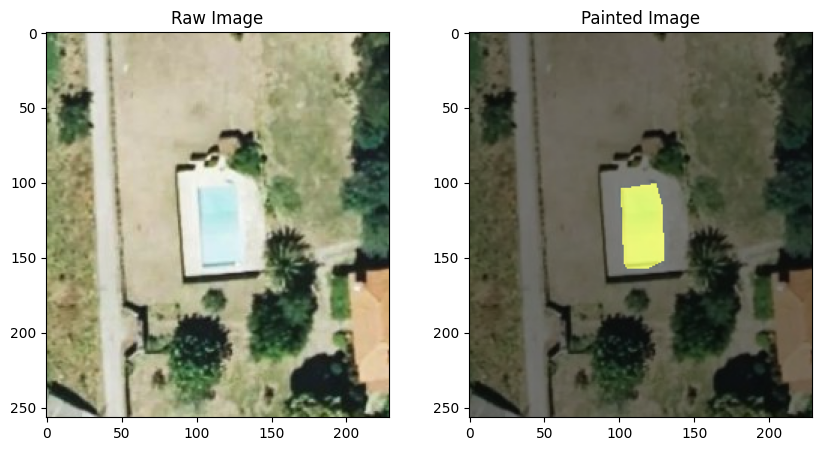

Keep image? (Y/N): Y
Images moved to keep


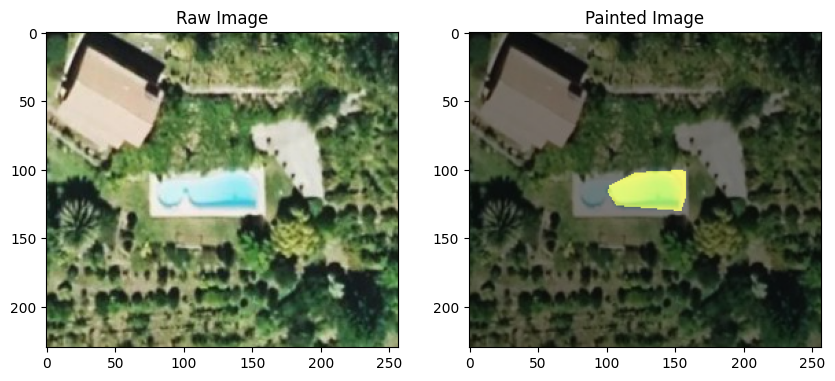

Keep image? (Y/N): N
Images not moved.


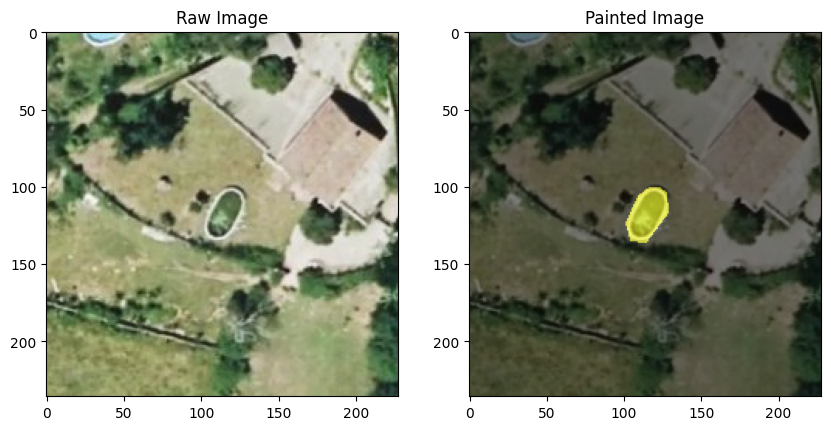

Keep image? (Y/N): Y
Images moved to keep


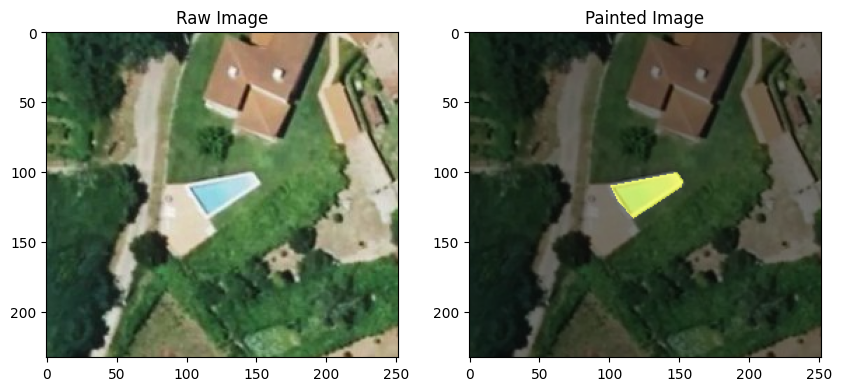

Keep image? (Y/N): Y
Images moved to keep


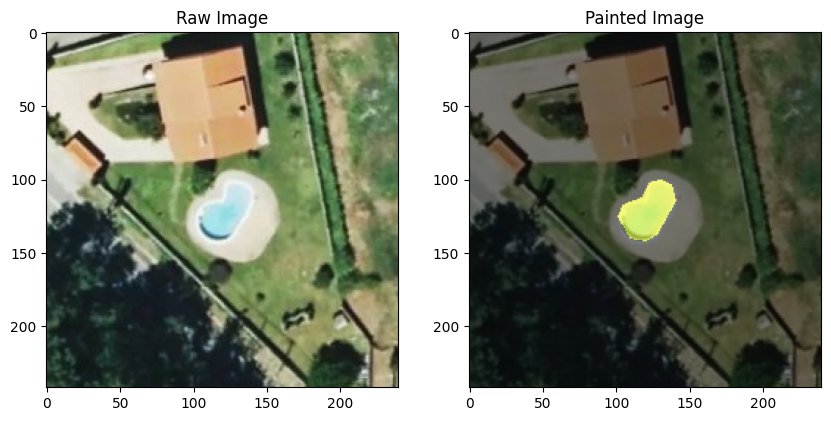

Keep image? (Y/N): Y
Images moved to keep


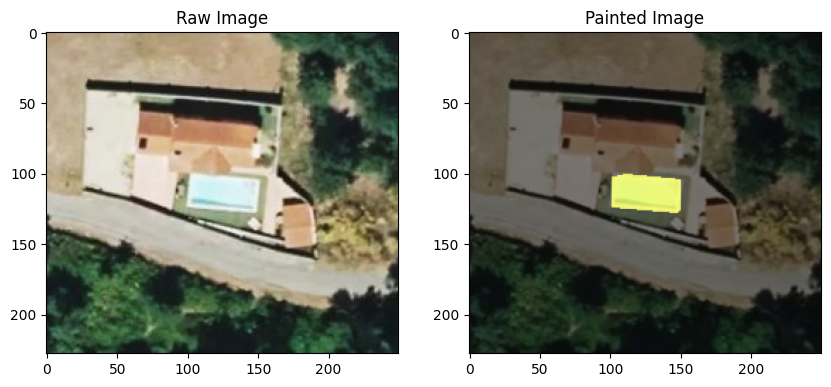

Keep image? (Y/N): Y
Images moved to keep


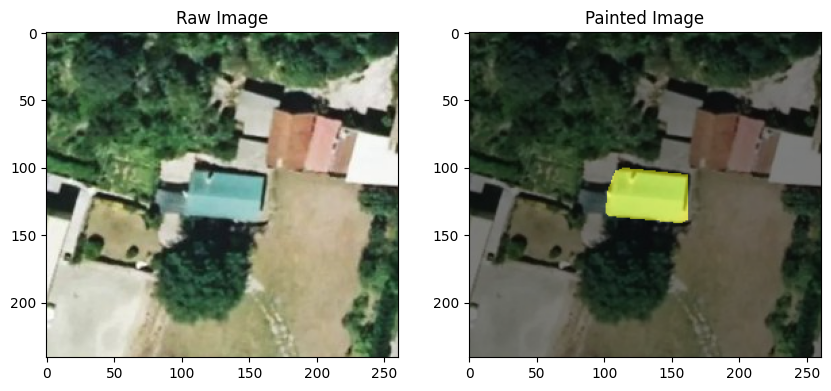

Keep image? (Y/N): N
Images not moved.


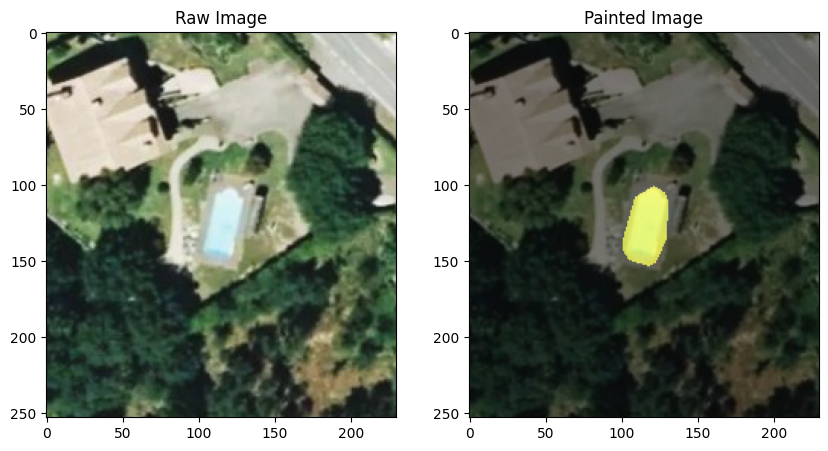

Keep image? (Y/N): N
Images not moved.


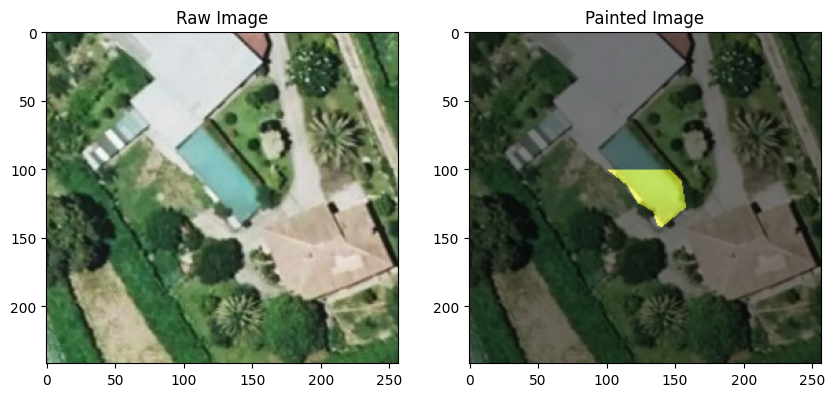

Keep image? (Y/N): N
Images not moved.


In [12]:
import shutil
import time
from pathlib import Path

from matplotlib import pyplot as plt

for new_polygon in Path("results").glob("**/*.json"):
    raw_image = new_polygon.with_suffix(".png")
    painted_image = f"{new_polygon.parent}/{new_polygon.stem}_painted.png"

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Assuming raw_image_path and painted_image_path are image file paths
    axes[0].imshow(plt.imread(raw_image))
    axes[0].set_title("Raw Image")

    axes[1].imshow(plt.imread(painted_image))
    axes[1].set_title("Painted Image")

    plt.show()
    time.sleep(1.5)

    user_input = input("Keep image? (Y/N): ")

    if user_input.upper() == "Y":
        keep_folder = Path("keep")
        keep_folder.mkdir(parents=True, exist_ok=True)
        shutil.move(new_polygon, keep_folder / new_polygon.name)
        print(f"Images moved to {keep_folder}")
    else:
        print("Images not moved.")

# Upload Results

In [13]:
from osm_ai_helper.upload_osm import upload

In [14]:
upload("keep")

2025-02-17 09:57:24.889 | INFO     | osm_ai_helper.upload_osm:load_token:44 - Token file /tmp/osm_token.json not found.
2025-02-17 09:57:24.891 | INFO     | osm_ai_helper.upload_osm:ensure_authorized_session:75 - No valid token found, starting authorization flow.


Please go to this URL and authorize the application: https://www.openstreetmap.org/oauth2/authorize?response_type=code&client_id=BWEOHFznxQWliV543qPB-lwfgsxjbM2NVVqsbJlD1nw&redirect_uri=https%3A%2F%2F127.0.0.1%3A8000&scope=write_api&state=B4bLBkUiWqyupNZ4jG6S54zdWFPlrS
Enter the full callback URL you were redirected to: https://127.0.0.1:8000/?code=31W3B1zbN2ogBv_J6EHPq0OvSRRozPSAQBUis4vmfec&state=B4bLBkUiWqyupNZ4jG6S54zdWFPlrS


2025-02-17 09:57:45.160 | INFO     | osm_ai_helper.upload_osm:authorize:62 - Token fetched successfully: {'access_token': 'u9fjR3kTCFsMQr-Tn6NPB1ASQ3K8sbidfsUcFISRTf0', 'token_type': 'Bearer', 'scope': ['write_api'], 'created_at': 1739531223}
2025-02-17 09:57:45.162 | INFO     | osm_ai_helper.upload_osm:authorize:65 - Token saved to /tmp/osm_token.json
2025-02-17 09:57:45.905 | INFO     | osm_ai_helper.upload_osm:open_changeset:117 - CREATE: <Response [200]>, b'162604131'
2025-02-17 09:57:46.136 | INFO     | osm_ai_helper.upload_osm:upload_polygon:166 - UPLOAD: <Response [200]>, b'<?xml version="1.0" encoding="UTF-8"?>\n<diffResult version="0.6" generator="openstreetmap-cgimap 2.0.1 (3448766 spike-06.openstreetmap.org)" copyright="OpenStreetMap and contributors" attribution="http://www.openstreetmap.org/copyright" license="http://opendatacommons.org/licenses/odbl/1-0/">\n <node old_id="-1" new_id="12595274203" new_version="1"/>\n <node old_id="-2" new_id="12595274204" new_version="1"/>